In [159]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm

In [160]:
# Load the Excel file and process data
file_path = 'Output_Parameters_Assembly.xlsx'
sheet_name = 'BottomSheetAndHatAssembly'
df = pd.read_excel(file_path, sheet_name=sheet_name)


In [161]:
# Function to process each value in the column (removing unwanted characters and splitting)
def process_data(value):
    value = value.replace('.xlsx', '')
    value = re.sub(r'(T|S|B|590|-)', '', value)
    split_data = re.split(r'(_|(?<=[a-zA-Z])(?=\d)|(?<=\d)(?=[a-zA-Z]))', value)
    split_data = [x for x in split_data if x not in ['_', '']]
    return split_data

In [162]:
# Apply processing function to the input column
df['Processed_Column'] = df.iloc[:, 0].apply(process_data)

# Extract numerical values from the Processed_Column and convert them to features
def extract_numeric_features(row):
    return [
        float(x) if x.isdigit() or x.replace('.', '', 1).isdigit() 
        else 100 if x == "DP" 
        else 200 if x == "AlNumi" 
        else 0  # default case for other non-numeric values
        for x in row
    ]


# Apply the function to create numerical features
X = df['Processed_Column'].apply(extract_numeric_features)

# Convert the feature list to a DataFrame (input matrix X)
X = pd.DataFrame(X.tolist())

# Output target column (Zone Size (mm))
y = df['Zone Size (mm)']
print("X = T_S_50_100DP590_100_52.5_15400-B_S_50_100AlNumi_150_50_25400_1" + str(X))

X = T_S_50_100DP590_100_52.5_15400-B_S_50_100AlNumi_150_50_25400_1        0      1    2      3     4        5     6      7    8      9     10  \
0     50.0  100.0  100  100.0  52.5  15400.0  50.0  100.0  200  150.0  50.0   
1     45.0  100.0  200  150.0  57.5  35400.0  55.0  100.0  200  100.0  60.0   
2     55.0  100.0  100  100.0  53.0  25400.0  50.0  100.0  200  200.0  55.0   
3     60.0  100.0  200  200.0  49.0  15400.0  45.0  100.0  200  200.0  45.0   
4     50.0  100.0  200  200.0  48.5  25400.0  45.0  100.0  200  150.0  50.0   
...    ...    ...  ...    ...   ...      ...   ...    ...  ...    ...   ...   
999   55.0  100.0  200  100.0  63.0  25400.0  60.0  100.0  200  200.0  50.0   
1000  45.0  100.0  100  150.0  58.0  25400.0  55.0  100.0  200  150.0  45.0   
1001  55.0  100.0  200  150.0  53.0  25400.0  50.0  100.0  100  150.0  55.0   
1002  45.0  100.0  200  100.0  47.5  25400.0  45.0  100.0  200  150.0  60.0   
1003  50.0  100.0  100  150.0  58.0  15400.0  55.0  100.0  200  1

In [163]:
# Calculate mean for each feature in the input data
input_means = X.mean()
print("Means of each input feature:")
print(input_means)



Means of each input feature:
0        51.792829
1       100.000000
2       146.812749
3       149.203187
4        54.927789
5     25330.278884
6        51.957171
7       100.000000
8       147.808765
9       147.858566
10       52.768924
11    25509.561753
12        1.441235
dtype: float64


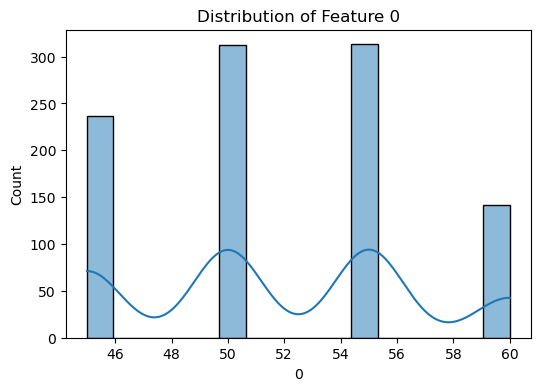

Shapiro-Wilk Test for Feature 0: p-value = 1.2673929629395167e-27


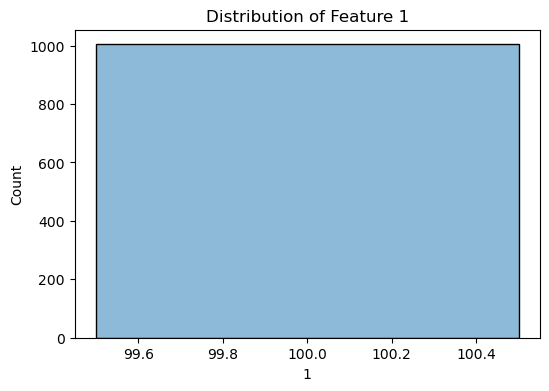

Shapiro-Wilk Test for Feature 1: p-value = 1.0


/Users/prakashkumar/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


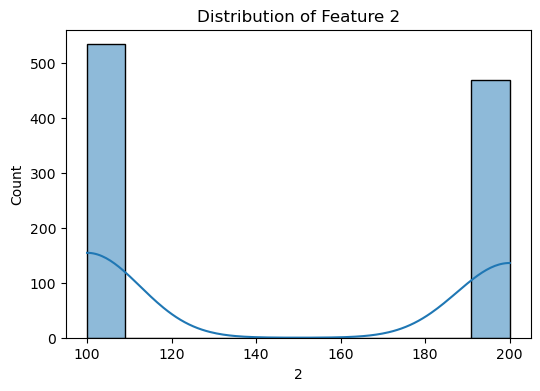

Shapiro-Wilk Test for Feature 2: p-value = 1.0320563189752278e-41


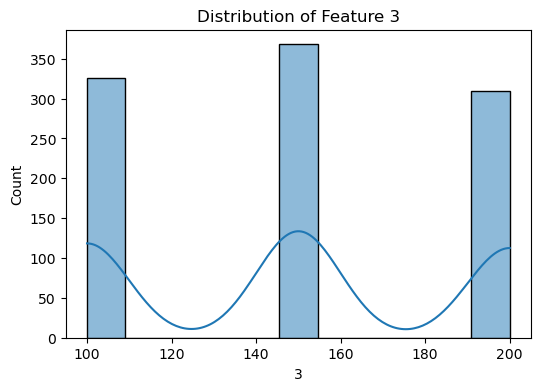

Shapiro-Wilk Test for Feature 3: p-value = 2.129304058732923e-33


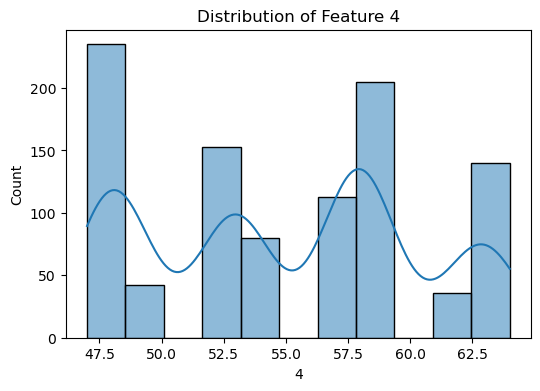

Shapiro-Wilk Test for Feature 4: p-value = 3.2239719677205965e-23


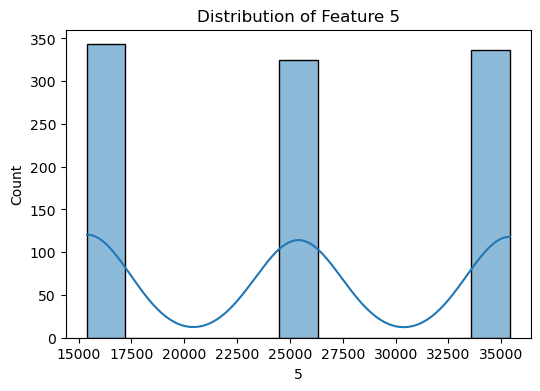

Shapiro-Wilk Test for Feature 5: p-value = 5.068395982007246e-34


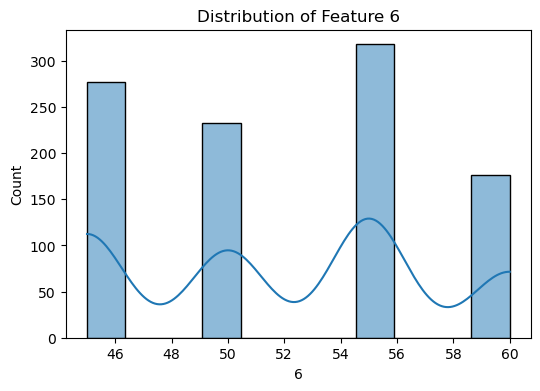

Shapiro-Wilk Test for Feature 6: p-value = 7.2659697438112e-29


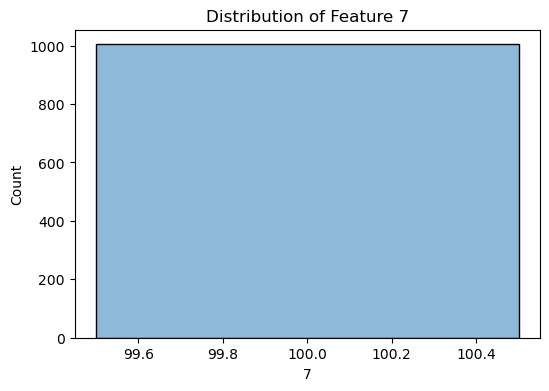

Shapiro-Wilk Test for Feature 7: p-value = 1.0


/Users/prakashkumar/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


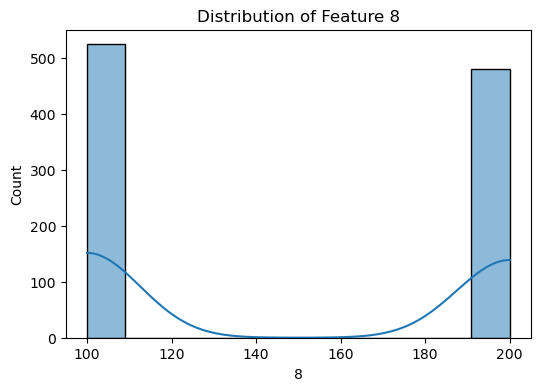

Shapiro-Wilk Test for Feature 8: p-value = 1.1074461763559029e-41


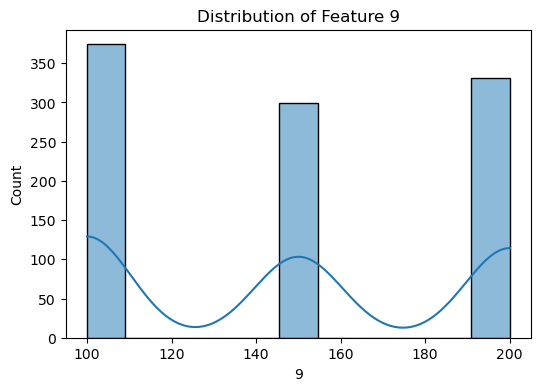

Shapiro-Wilk Test for Feature 9: p-value = 1.6331196969328033e-34


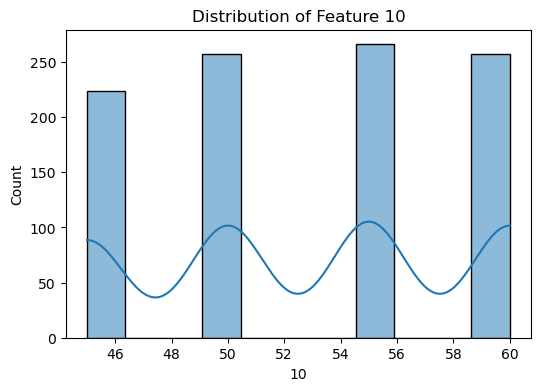

Shapiro-Wilk Test for Feature 10: p-value = 6.783569431725269e-29


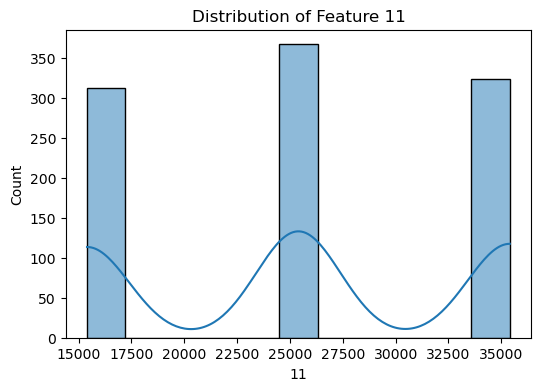

Shapiro-Wilk Test for Feature 11: p-value = 2.0798690111510763e-33


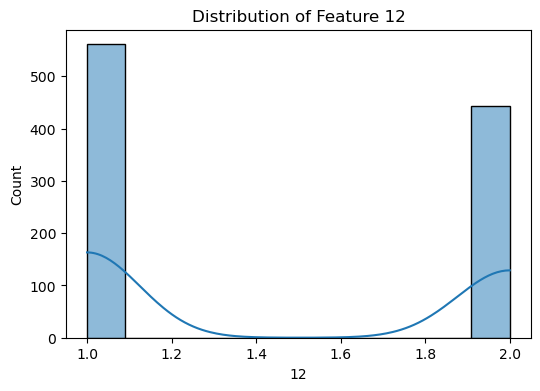

Shapiro-Wilk Test for Feature 12: p-value = 7.438092248636129e-42


In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Plot histograms for each feature to visually inspect normality
for i, column in enumerate(X.columns):
    plt.figure(figsize=(6, 4))
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of Feature {i}')
    plt.show()

    # Perform Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(X[column])
    print(f'Shapiro-Wilk Test for Feature {i}: p-value = {p_value}')


In [165]:
# Step 5: Remove the 2nd and 8th columns from X (Note: Python is 0-indexed)
X = X.drop(columns=[1, 7]) 
X.columns = [
    "Channel_Width_T",
    "material 100:DP590 200:AlNumi_T",
    "Thickness_T",
    "Draw_Depth_T",
    "Blank_Holding_Force_T",
    "Channel_Width_B",
    "material 100:DP590 200:AlNumi_B",
    "Thickness_B",
    "Draw_Depth_B",
    "Blank_Holding_Force_B",
    "Weld_Pattern(1,2 = 4,3 welds/flange)"
]
print(X)

      Channel_Width_T  material 100:DP590 200:AlNumi_T  Thickness_T  \
0                50.0                              100        100.0   
1                45.0                              200        150.0   
2                55.0                              100        100.0   
3                60.0                              200        200.0   
4                50.0                              200        200.0   
...               ...                              ...          ...   
999              55.0                              200        100.0   
1000             45.0                              100        150.0   
1001             55.0                              200        150.0   
1002             45.0                              200        100.0   
1003             50.0                              100        150.0   

      Draw_Depth_T  Blank_Holding_Force_T  Channel_Width_B  \
0             52.5                15400.0             50.0   
1             57.5     

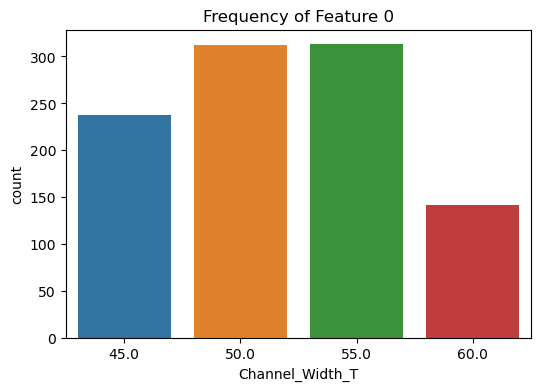

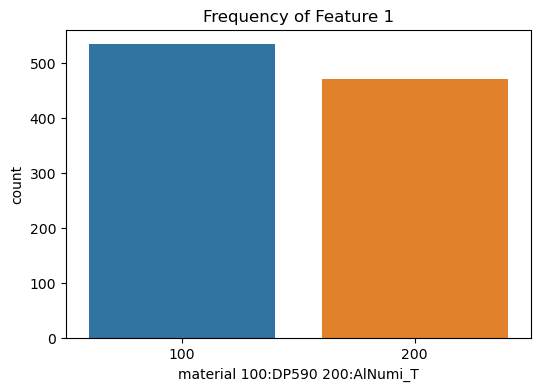

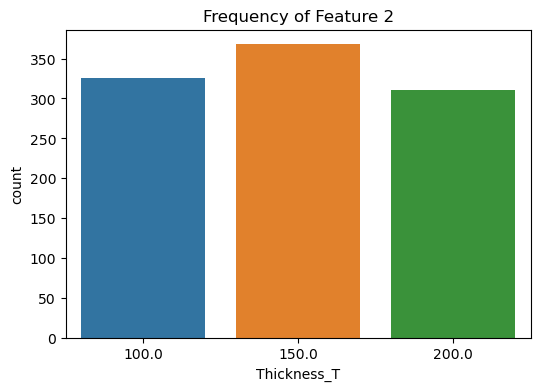

Feature 3 has more than 10 unique values: 20


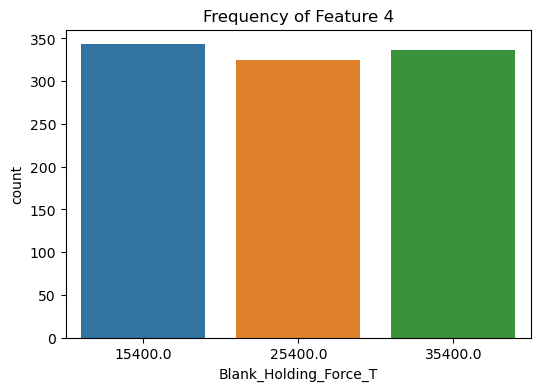

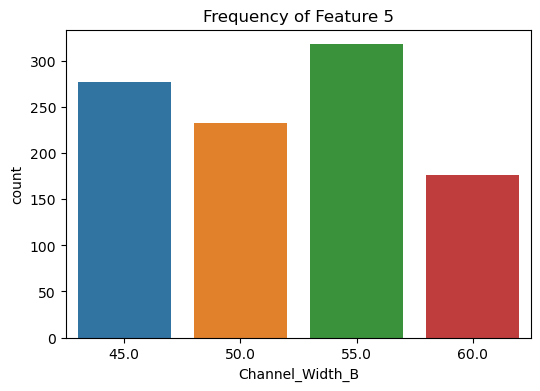

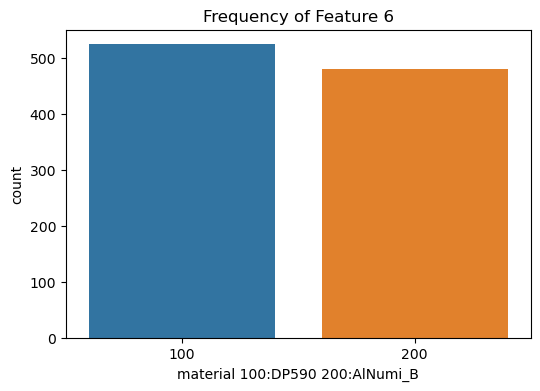

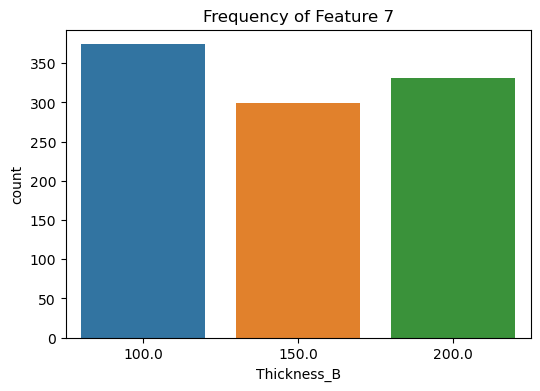

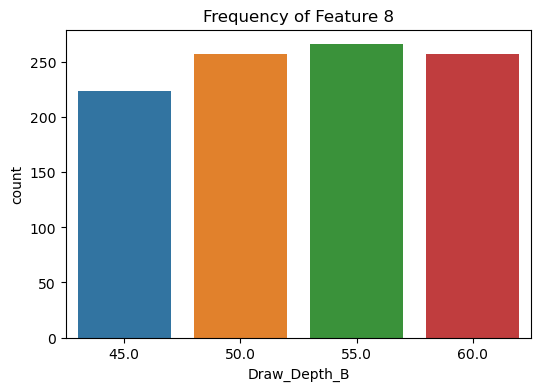

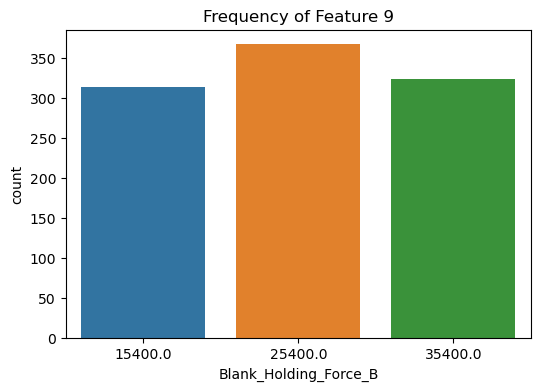

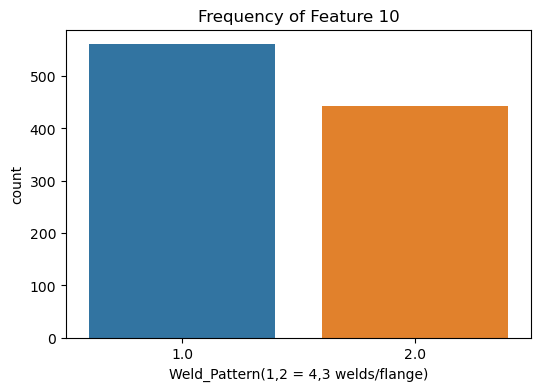

In [166]:
# Count unique entries for each feature and plot frequency if smaller than 10
for i, column in enumerate(X.columns):
    unique_values = X[column].nunique()
    if unique_values < 10:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=X[column])
        plt.title(f'Frequency of Feature {i}')
        plt.show()
    else:
        print(f'Feature {i} has more than 10 unique values: {unique_values}')


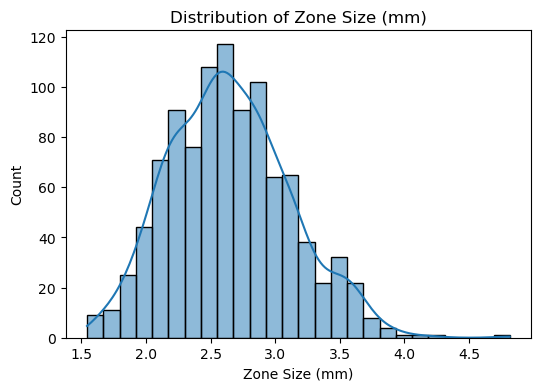

Shapiro-Wilk Test for Output (Zone Size (mm)): p-value = 2.3271395548363216e-06


In [167]:
# Plot the distribution of the output column 'Zone Size (mm)'
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title('Distribution of Zone Size (mm)')
plt.show()

# Perform Shapiro-Wilk test for normality on the output column
stat, p_value = stats.shapiro(y)
print(f'Shapiro-Wilk Test for Output (Zone Size (mm)): p-value = {p_value}')


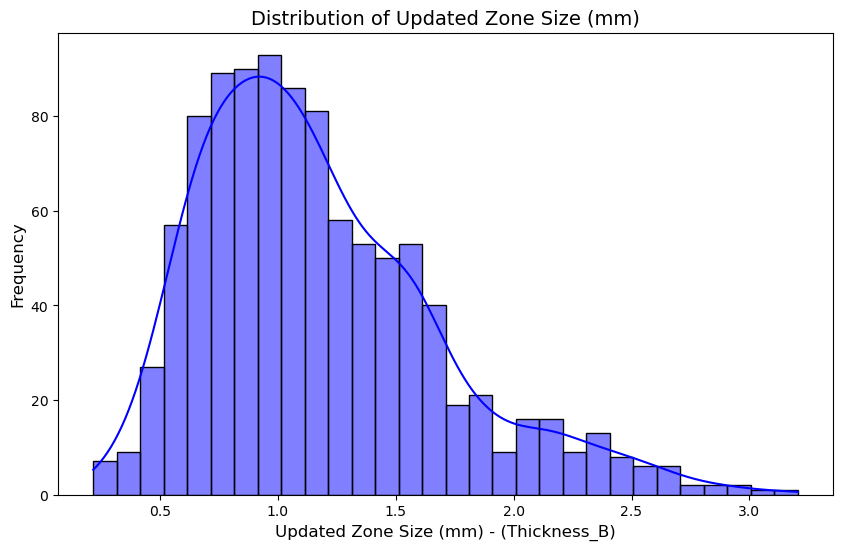

In [168]:
y_updated = y - (X['Thickness_B']/100) # substracting the thickness of the hat sheet and the flat sheet

# Step 2: Plot the distribution of the updated y
plt.figure(figsize=(10, 6))

# Plotting the histogram and KDE of the updated y
sns.histplot(y_updated, kde=True, bins=30, color='blue')

# Adding labels and title
plt.xlabel('Updated Zone Size (mm) - (Thickness_B)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Updated Zone Size (mm)', fontsize=14)

# Show the plot
plt.show()

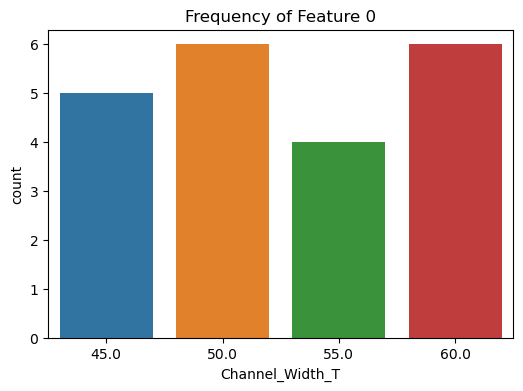

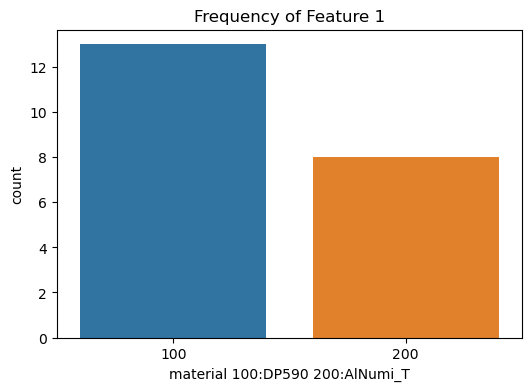

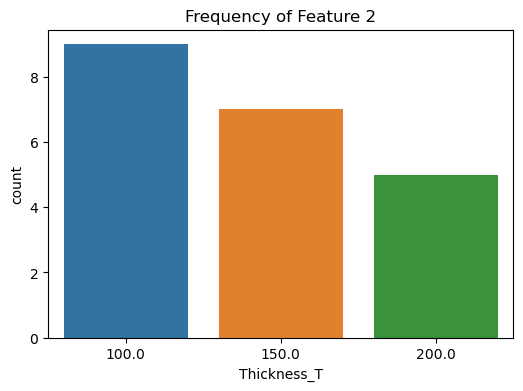

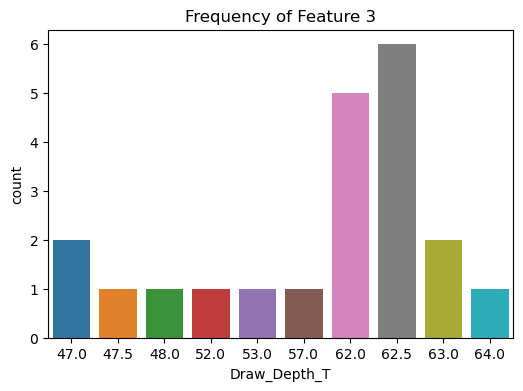

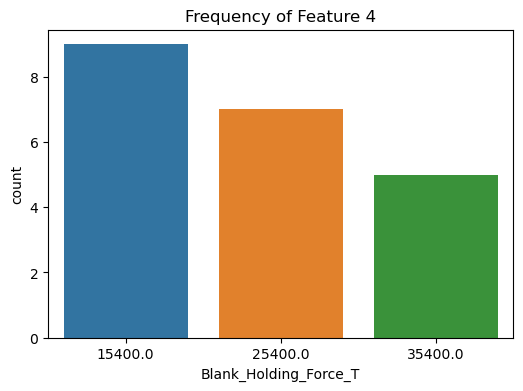

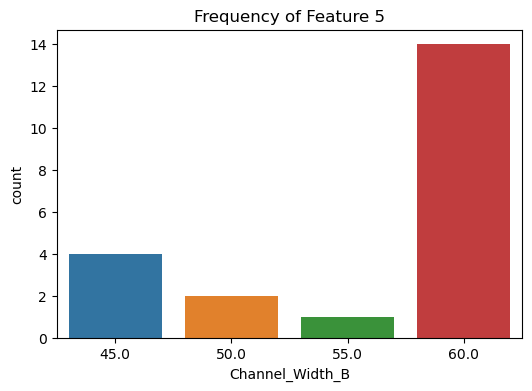

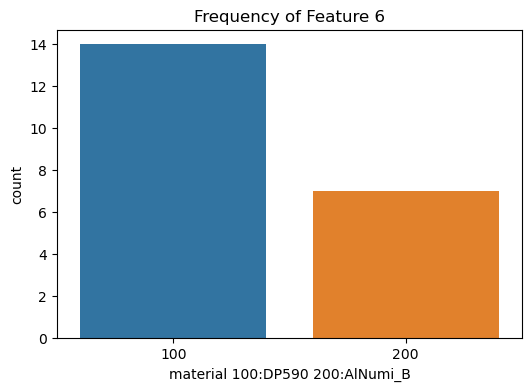

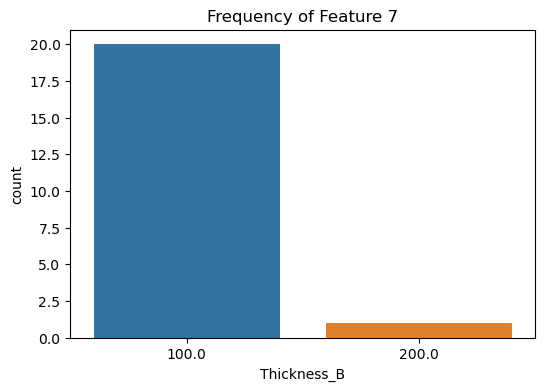

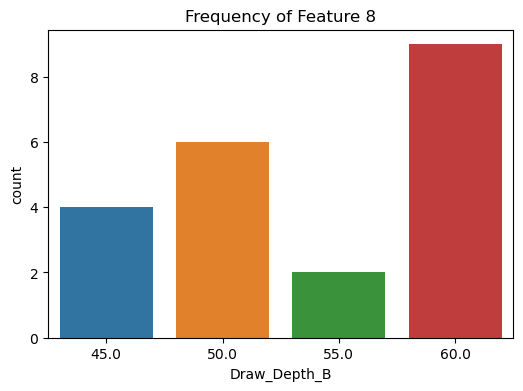

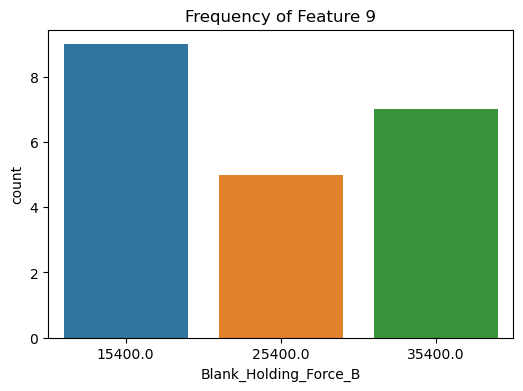

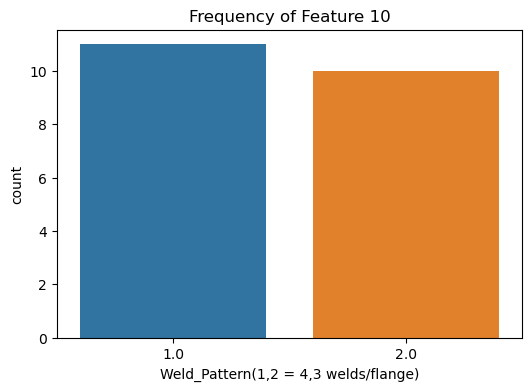

In [169]:
# Step 1: Filter rows where y_updated > 2.5
filtered_X = X[y_updated > 2.5]

# Count unique entries for each feature and plot frequency if smaller than 10
for i, column in enumerate(filtered_X.columns):
    unique_values = filtered_X[column].nunique()
    if unique_values < 20:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=filtered_X[column])
        plt.title(f'Frequency of Feature {i}')
        plt.show()
    else:
        print(f'Feature {i} has more than 10 unique values: {unique_values}')

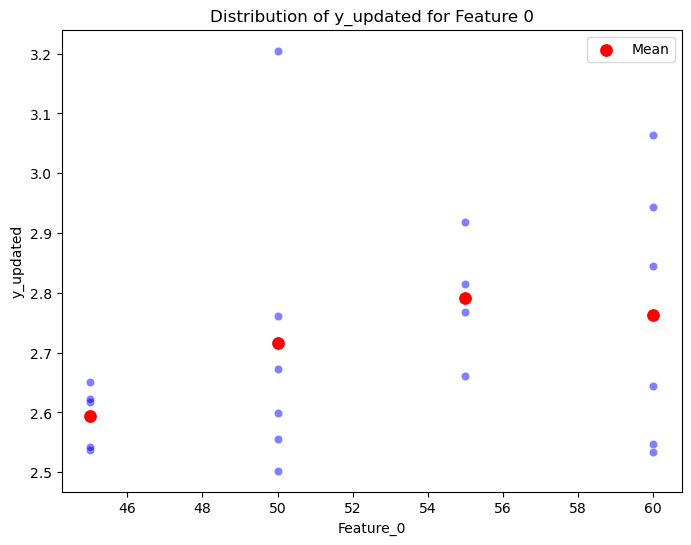

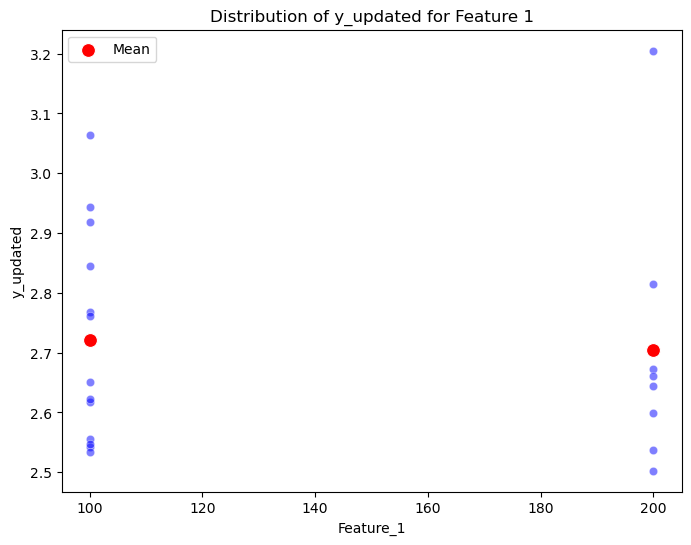

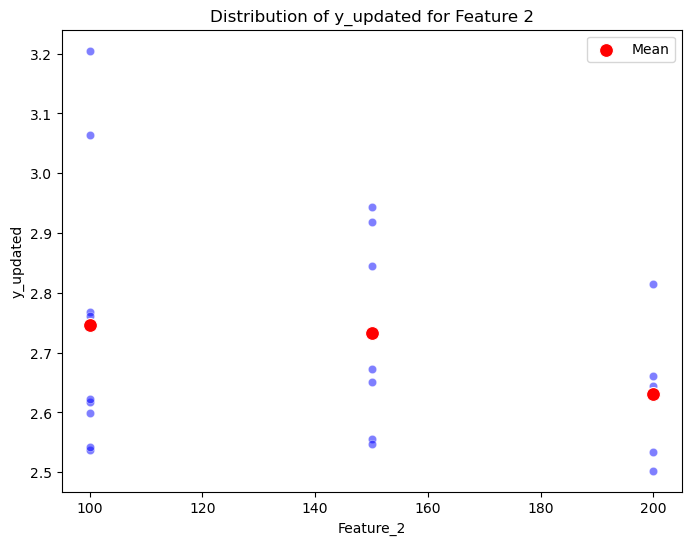

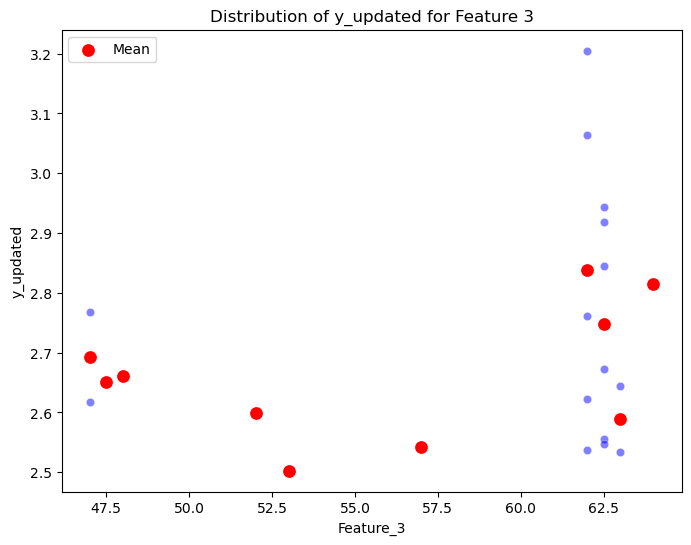

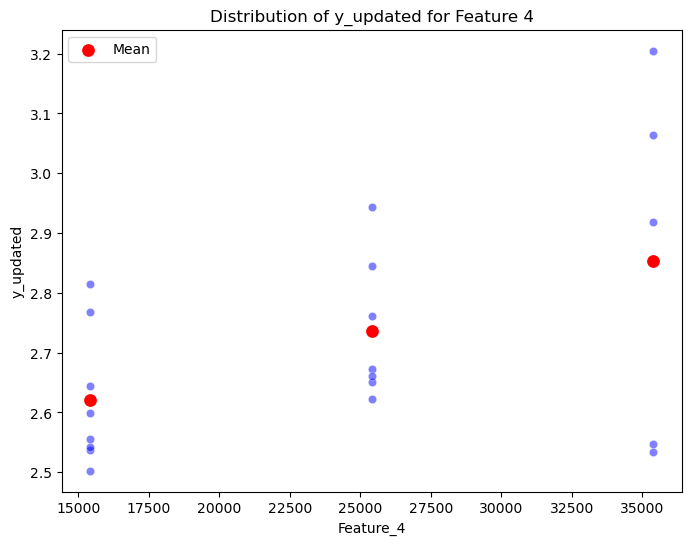

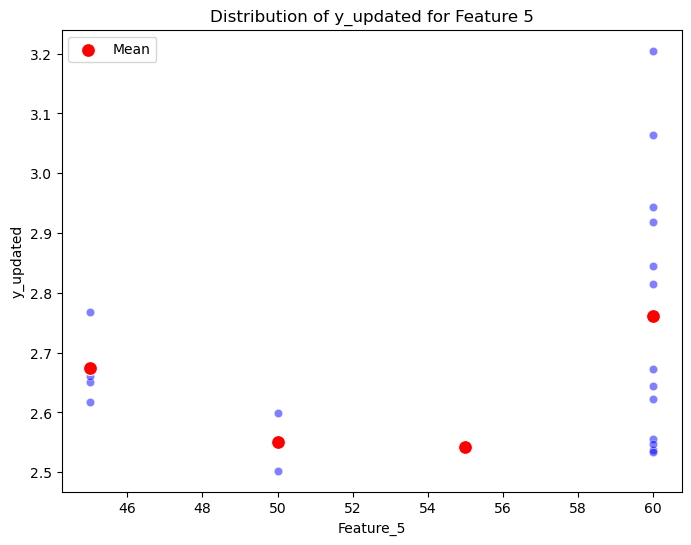

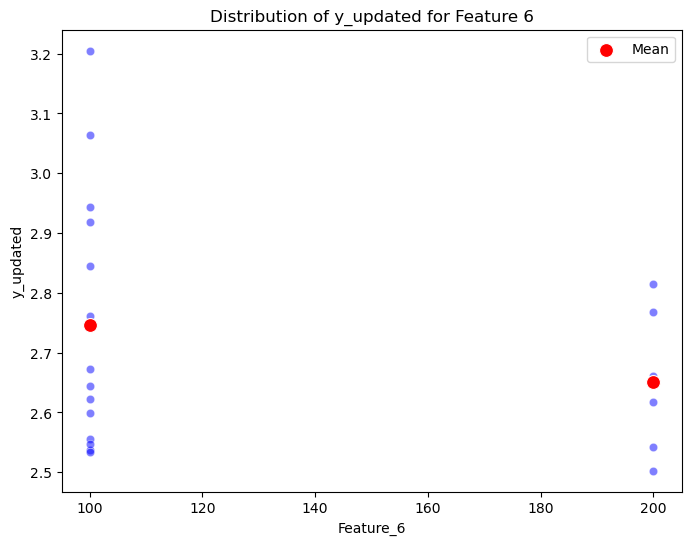

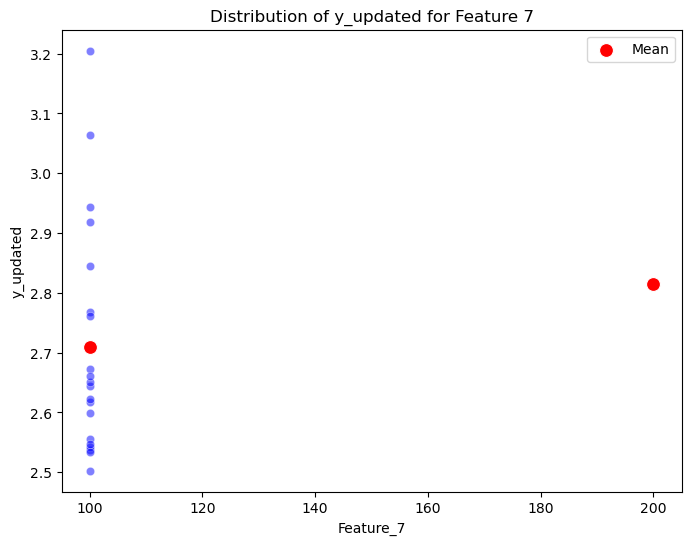

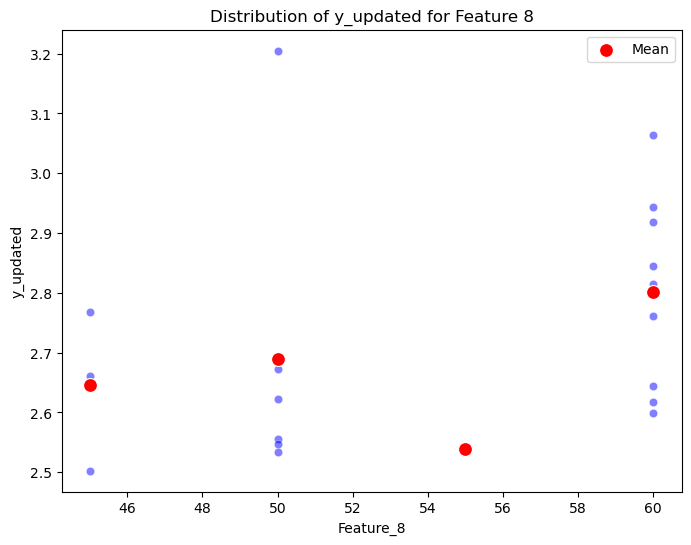

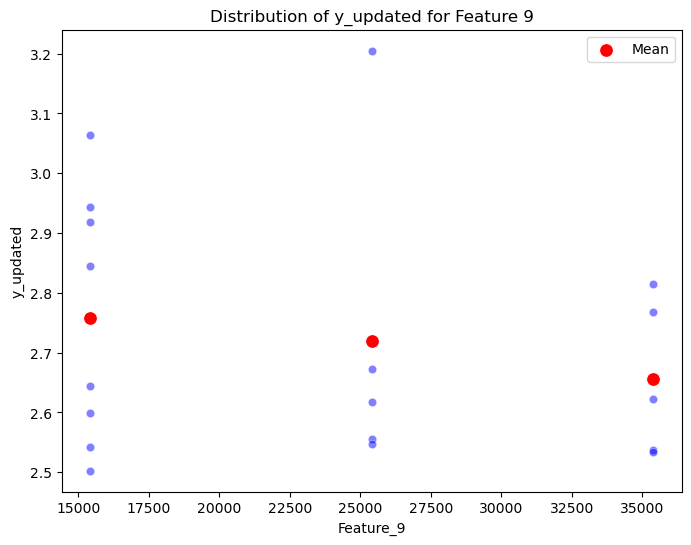

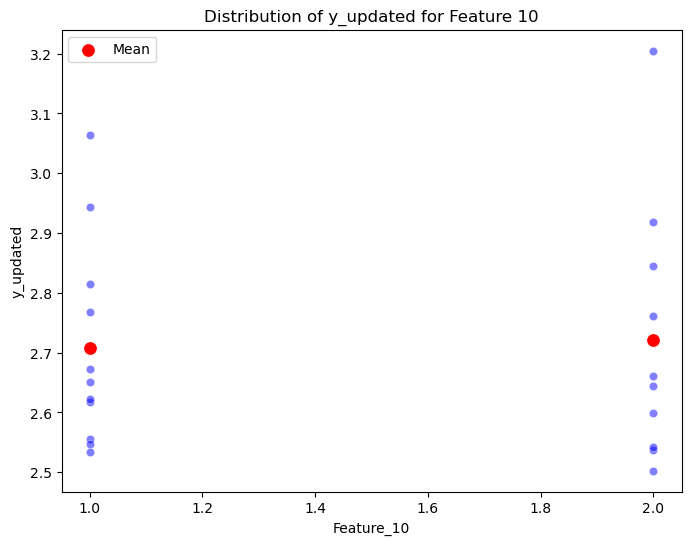

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter rows where y_updated > 2.5
filtered_X = X[y_updated > 2.5]
filtered_y = y_updated[y_updated > 2.5]

# Iterate through each feature/column in filtered_X
for i, column in enumerate(filtered_X.columns):
    unique_values = filtered_X[column].nunique()
    
    # Check if the number of unique values is less than 20
    if unique_values < 20:
        plt.figure(figsize=(8, 6))
        
        # Create a DataFrame with the feature column and corresponding y_updated values
        data = pd.DataFrame({f'Feature_{i}': filtered_X[column], 'y_updated': filtered_y})
        
        # Scatter plot: plot 'Feature_i' against 'y_updated'
        sns.scatterplot(x=f'Feature_{i}', y='y_updated', data=data, color='blue', alpha=0.5)
        
        # Calculate the mean of 'y_updated' for each unique value in 'Feature_i'
        means = data.groupby(f'Feature_{i}')['y_updated'].mean().reset_index()
        
        # Plot the mean as red points
        sns.scatterplot(x=f'Feature_{i}', y='y_updated', data=means, color='red', s=100, label='Mean')
        
        plt.title(f'Distribution of y_updated for Feature {i}')
        plt.legend()
        plt.show()
    else:
        print(f'Feature {i} has more than 10 unique values: {unique_values}')







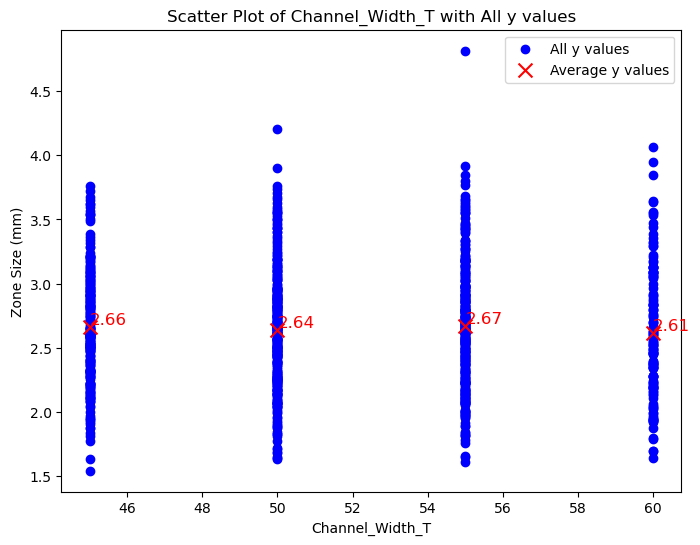

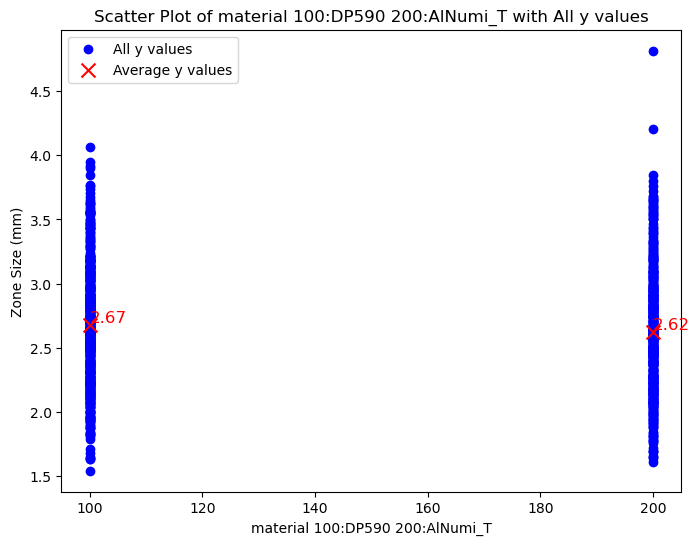

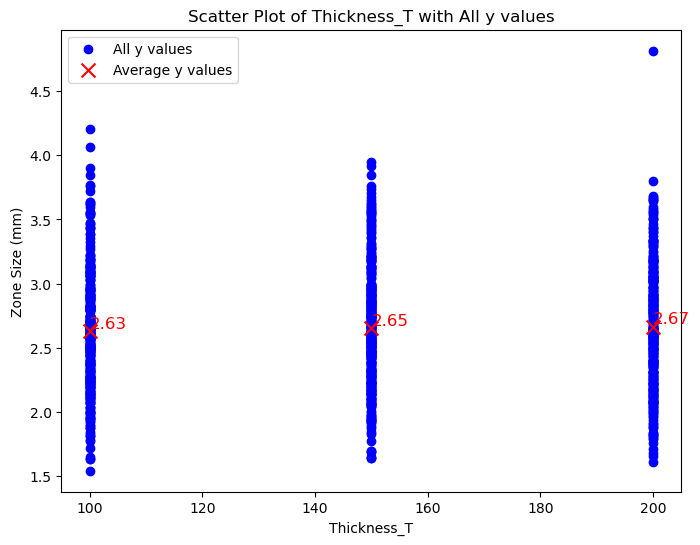

Feature "Draw_Depth_T" has more than 10 unique values: 20


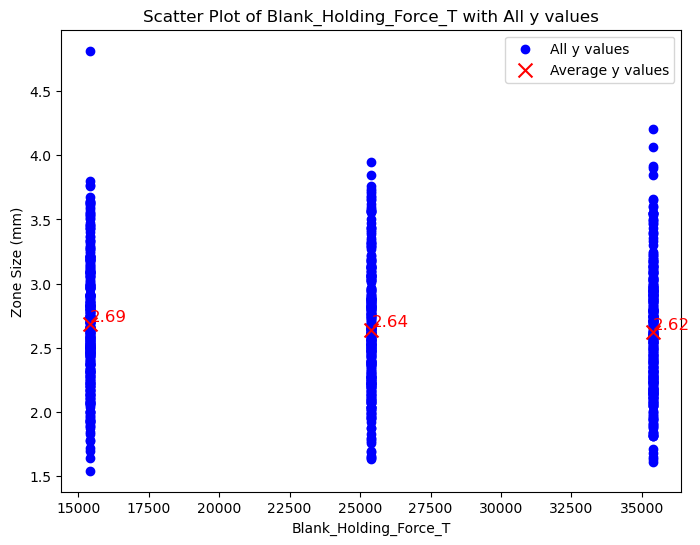

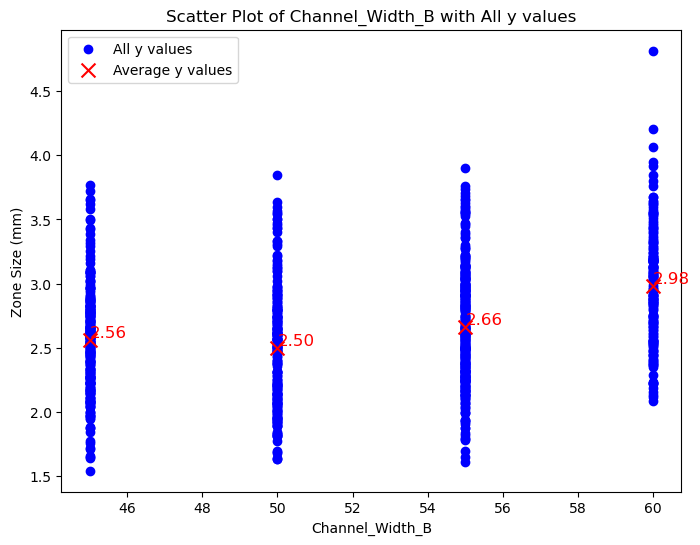

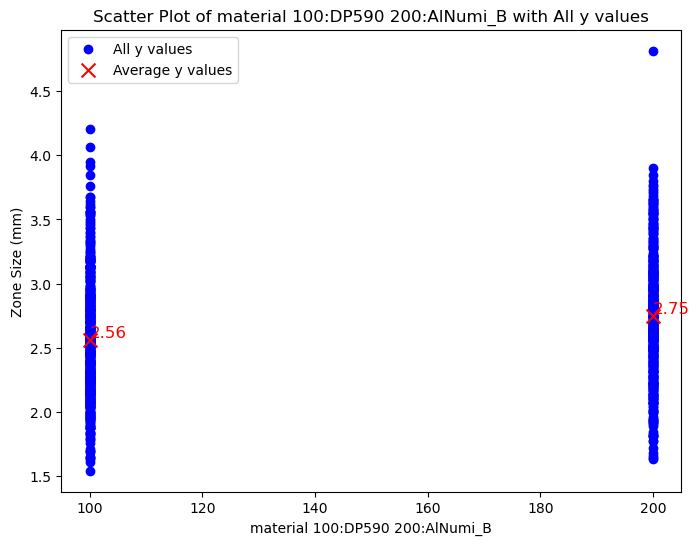

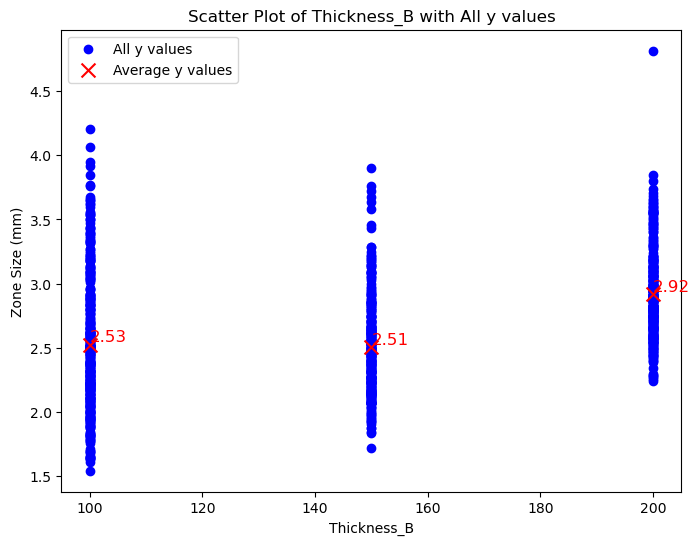

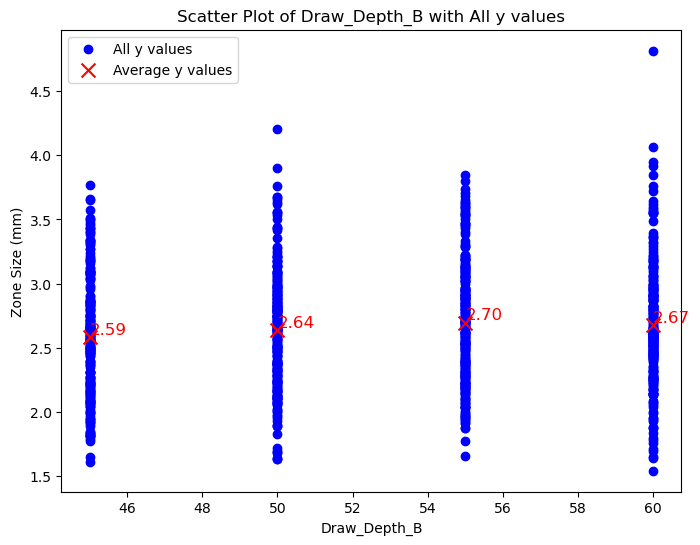

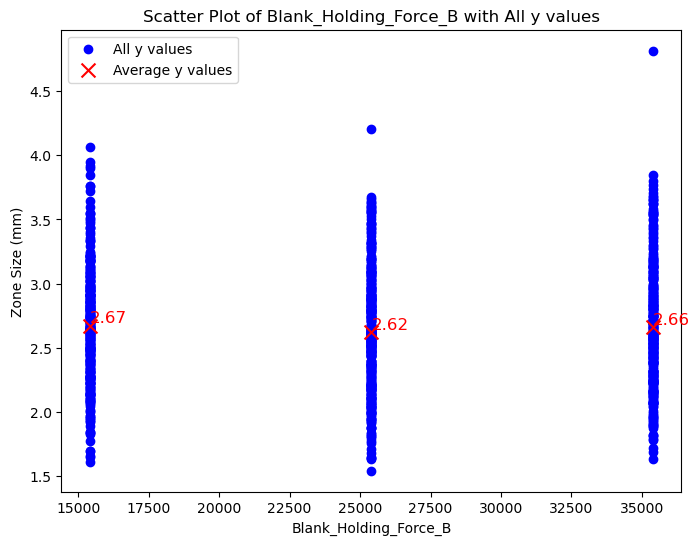

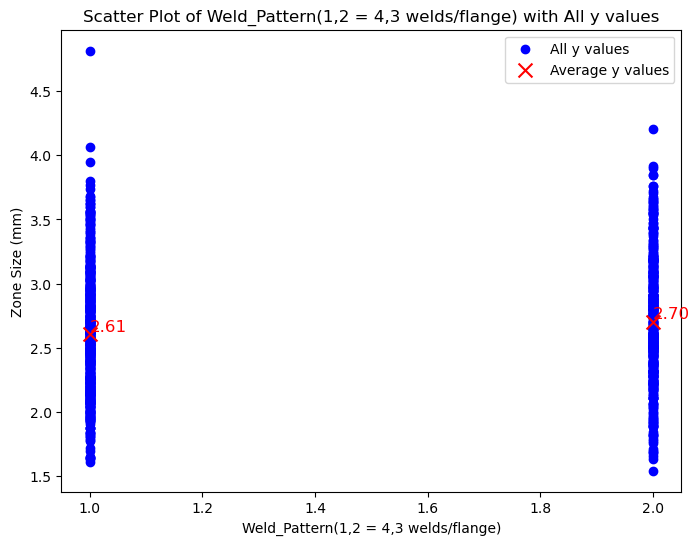

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loop through each feature using column names
for column in X.columns:
    unique_values = X[column].nunique()
    
    # Only proceed if unique entries are less than 10
    if unique_values < 10:
        plt.figure(figsize=(8, 6))
        
        # Group X[column] by unique values and their corresponding y values (consider all y values)
        grouped_data = pd.concat([X[column], y], axis=1)
        
        # Plot scatter plot of X vs. y values (all y values)
        plt.scatter(grouped_data[column], grouped_data['Zone Size (mm)'], label='All y values', color='blue')

        # Calculate and plot the average of all y values for each unique value in X
        averages = grouped_data.groupby(column)['Zone Size (mm)'].mean()
        plt.scatter(averages.index, averages.values, color='red', label='Average y values', s=100, zorder=5, marker='x')

        # Annotate the average values on the plot
        for idx, avg in averages.items():
            plt.text(idx, avg, f'{avg:.2f}', fontsize=12, ha='left', va='bottom', color='Red')

        # Set plot details with feature name in title
        plt.title(f'Scatter Plot of {column} with All y values')
        plt.xlabel(f'{column}')
        plt.ylabel('Zone Size (mm)')
        plt.legend()
        plt.show()
    else:
        print(f'Feature "{column}" has more than 10 unique values: {unique_values}')



Training Loss (MSE): 0.00416315626729043
Test Loss (MSE): 0.2020431359841595


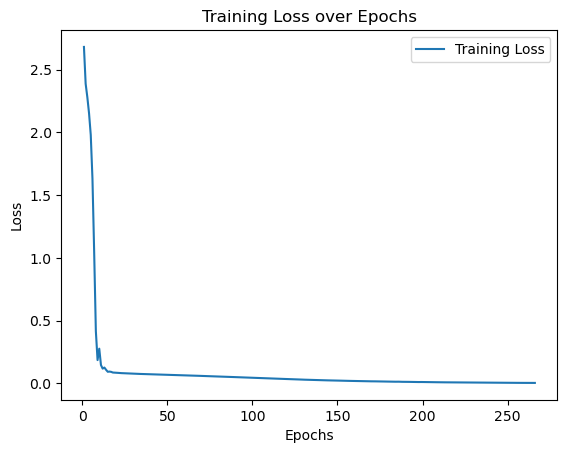

Test MSE: 0.2020431359841595


In [172]:
# Train-test split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y_updated, test_size=0.1, random_state=42)

# Feature scaling for input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50,20,20,20,10,10, 10, 5), 
                   activation='relu', 
                   solver='adam', 
                   max_iter=1000, 
                   random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predictions and performance evaluation
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

# Calculate Mean Squared Error
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(f"Training Loss (MSE): {train_loss}")
print(f"Test Loss (MSE): {test_loss}")

# Plot training and test loss
epochs = np.arange(1, len(mlp.loss_curve_) + 1)

plt.plot(epochs, mlp.loss_curve_, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Evaluate model performance on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")


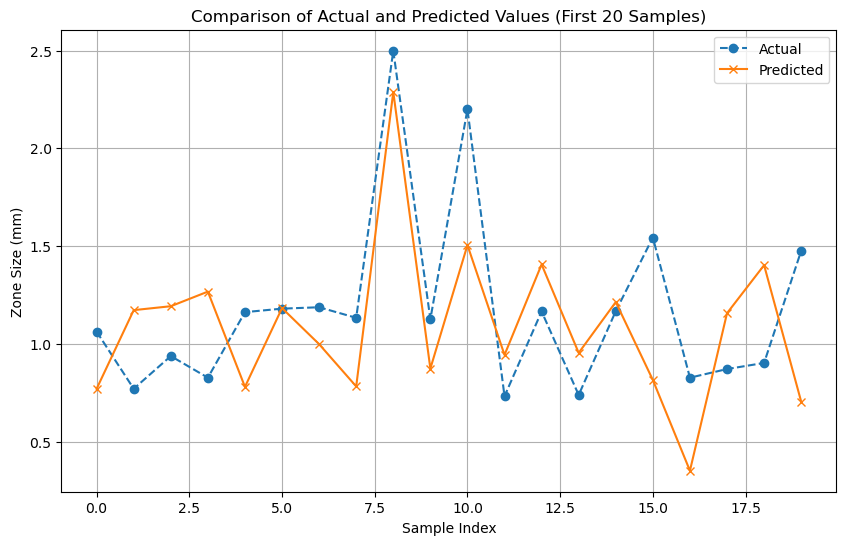

In [173]:
# Plot first 20 predicted vs actual values for the test set
y_test_pred_20 = y_test_pred[:20]
y_test_20 = y_test[:20].values

plt.figure(figsize=(10, 6))
plt.plot(y_test_20, label='Actual', marker='o', linestyle='--')
plt.plot(y_test_pred_20, label='Predicted', marker='x', linestyle='-')
plt.xlabel('Sample Index')
plt.ylabel('Zone Size (mm)')
plt.title('Comparison of Actual and Predicted Values (First 20 Samples)')
plt.legend()
plt.grid(True)
plt.show()

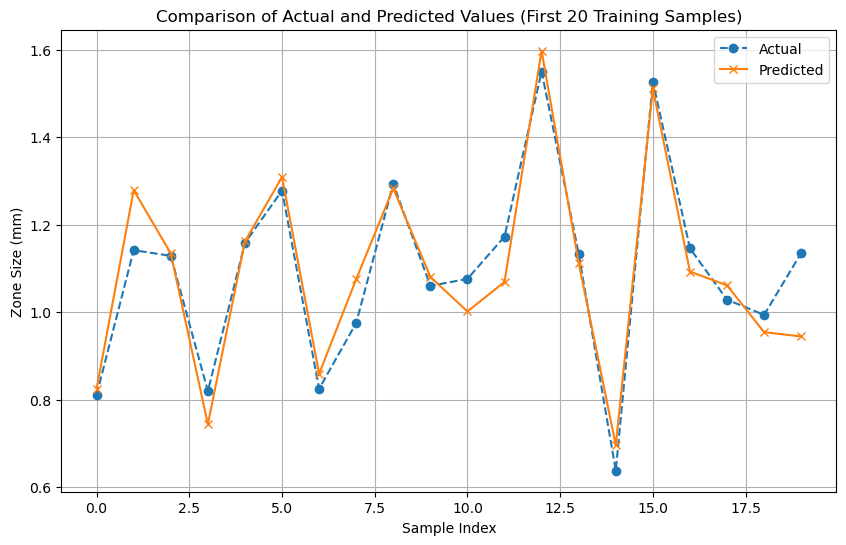

In [174]:
# Plot first 20 predicted vs actual values for the training set
y_train_pred_20 = y_train_pred[:20]
y_train_20 = y_train[:20].values

plt.figure(figsize=(10, 6))
plt.plot(y_train_20, label='Actual', marker='o', linestyle='--')
plt.plot(y_train_pred_20, label='Predicted', marker='x', linestyle='-')
plt.xlabel('Sample Index')
plt.ylabel('Zone Size (mm)')
plt.title('Comparison of Actual and Predicted Values (First 20 Training Samples)')
plt.legend()
plt.grid(True)
plt.show()

Training Loss (MSE): 0.0024888016866552952
Test Loss (MSE): 0.18401409594011348


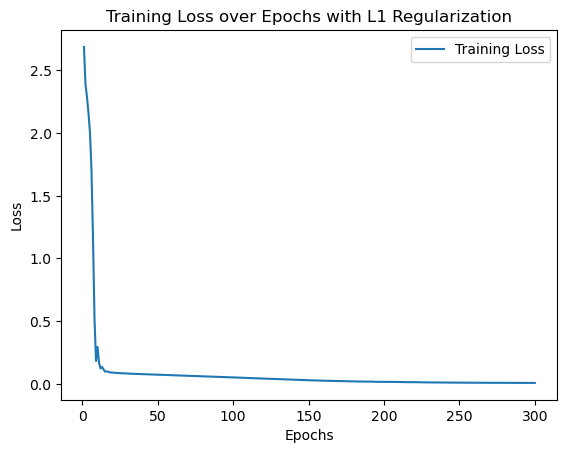

Test MSE: 0.18401409594011348


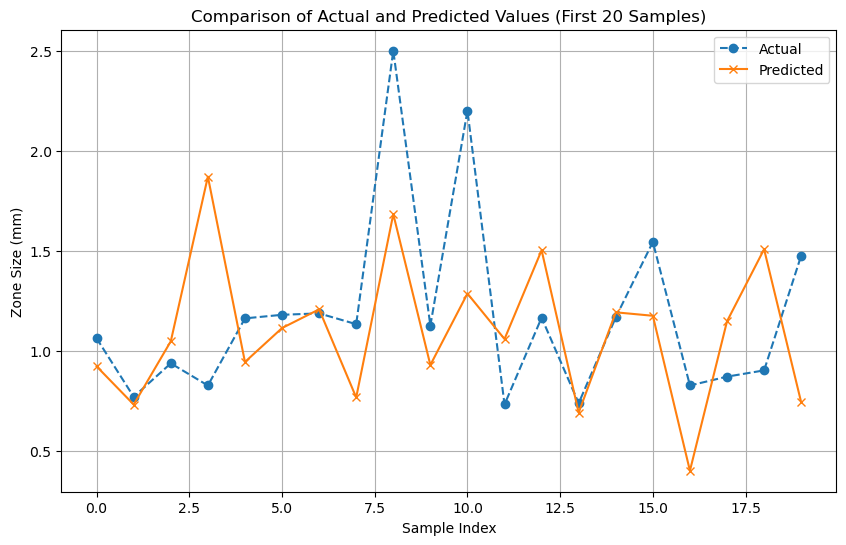

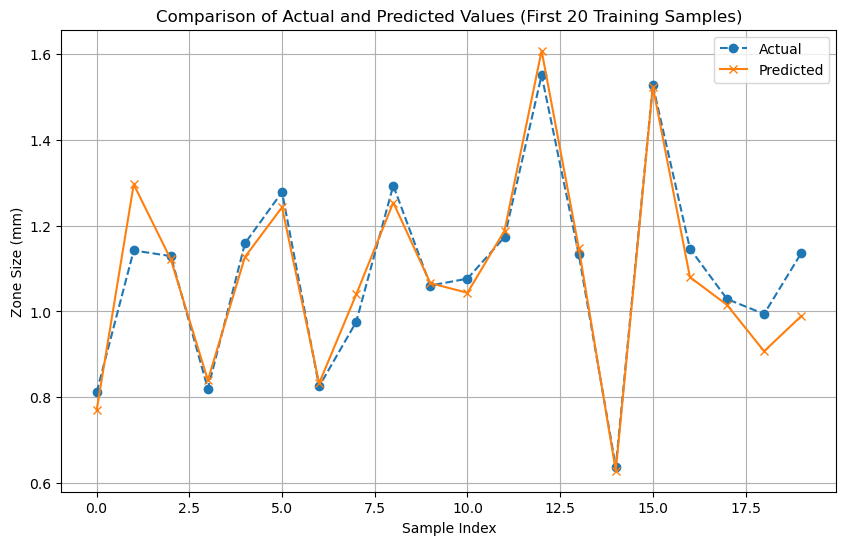

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

# Train-test split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y_updated, test_size=0.1, random_state=42)

# Feature scaling for input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model with ElasticNet regularization (L1 + L2)
mlp = MLPRegressor(hidden_layer_sizes=(50, 50, 50, 20, 20, 20, 10, 10, 10, 5),
                   activation='relu',
                   solver='adam',
                   alpha=0.01,  # Regularization strength
                   max_iter=1000,
                   random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predictions and performance evaluation
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

# Calculate Mean Squared Error
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(f"Training Loss (MSE): {train_loss}")
print(f"Test Loss (MSE): {test_loss}")

# Plot training loss over epochs
epochs = np.arange(1, len(mlp.loss_curve_) + 1)

plt.plot(epochs, mlp.loss_curve_, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs with L1 Regularization')
plt.legend()
plt.show()

# Evaluate model performance on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")
# Plot first 20 predicted vs actual values for the test set
y_test_pred_20 = y_test_pred[:20]
y_test_20 = y_test[:20].values

plt.figure(figsize=(10, 6))
plt.plot(y_test_20, label='Actual', marker='o', linestyle='--')
plt.plot(y_test_pred_20, label='Predicted', marker='x', linestyle='-')
plt.xlabel('Sample Index')
plt.ylabel('Zone Size (mm)')
plt.title('Comparison of Actual and Predicted Values (First 20 Samples)')
plt.legend()
plt.grid(True)
plt.show()
# Plot first 20 predicted vs actual values for the training set
y_train_pred_20 = y_train_pred[:20]
y_train_20 = y_train[:20].values

plt.figure(figsize=(10, 6))
plt.plot(y_train_20, label='Actual', marker='o', linestyle='--')
plt.plot(y_train_pred_20, label='Predicted', marker='x', linestyle='-')
plt.xlabel('Sample Index')
plt.ylabel('Zone Size (mm)')
plt.title('Comparison of Actual and Predicted Values (First 20 Training Samples)')
plt.legend()
plt.grid(True)
plt.show()


Training Loss (MSE): 0.00412749880574616
Test Loss (MSE): 0.17194302709678846


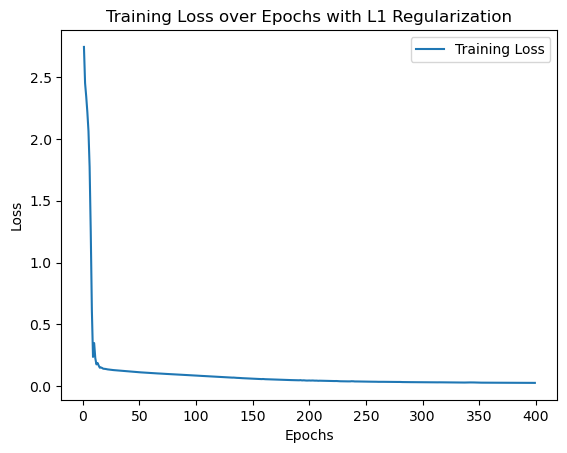

Test MSE: 0.17194302709678846


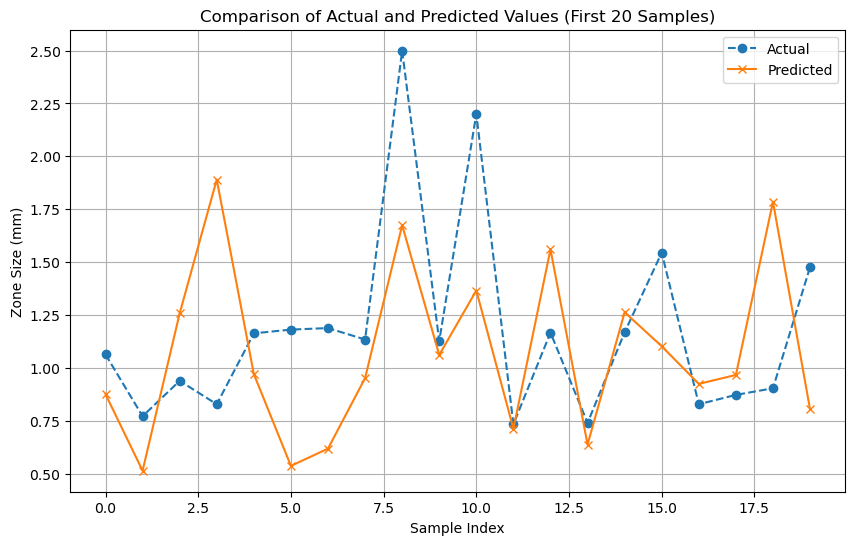

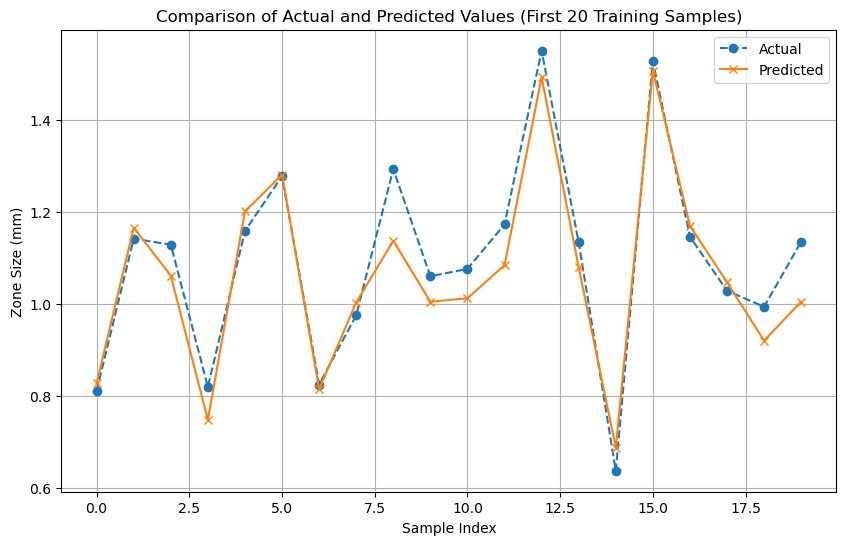

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

# Train-test split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y_updated, test_size=0.1, random_state=42)

# Feature scaling for input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model with ElasticNet regularization (L1 + L2)
mlp = MLPRegressor(hidden_layer_sizes=(50, 50, 50, 20, 20, 20, 10, 10, 10, 5),
                   activation='relu',
                   solver='adam',
                   alpha=0.1,  # Regularization strength
                   max_iter=1000,
                   random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predictions and performance evaluation
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

# Calculate Mean Squared Error
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(f"Training Loss (MSE): {train_loss}")
print(f"Test Loss (MSE): {test_loss}")

# Plot training loss over epochs
epochs = np.arange(1, len(mlp.loss_curve_) + 1)

plt.plot(epochs, mlp.loss_curve_, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs with L1 Regularization')
plt.legend()
plt.show()

# Evaluate model performance on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")
# Plot first 20 predicted vs actual values for the test set
y_test_pred_20 = y_test_pred[:20]
y_test_20 = y_test[:20].values

plt.figure(figsize=(10, 6))
plt.plot(y_test_20, label='Actual', marker='o', linestyle='--')
plt.plot(y_test_pred_20, label='Predicted', marker='x', linestyle='-')
plt.xlabel('Sample Index')
plt.ylabel('Zone Size (mm)')
plt.title('Comparison of Actual and Predicted Values (First 20 Samples)')
plt.legend()
plt.grid(True)
plt.show()
# Plot first 20 predicted vs actual values for the training set
y_train_pred_20 = y_train_pred[:20]
y_train_20 = y_train[:20].values

plt.figure(figsize=(10, 6))
plt.plot(y_train_20, label='Actual', marker='o', linestyle='--')
plt.plot(y_train_pred_20, label='Predicted', marker='x', linestyle='-')
plt.xlabel('Sample Index')
plt.ylabel('Zone Size (mm)')
plt.title('Comparison of Actual and Predicted Values (First 20 Training Samples)')
plt.legend()
plt.grid(True)
plt.show()

Training Loss (MSE): 0.12408786416923409
Test Loss (MSE): 0.14063386651481036


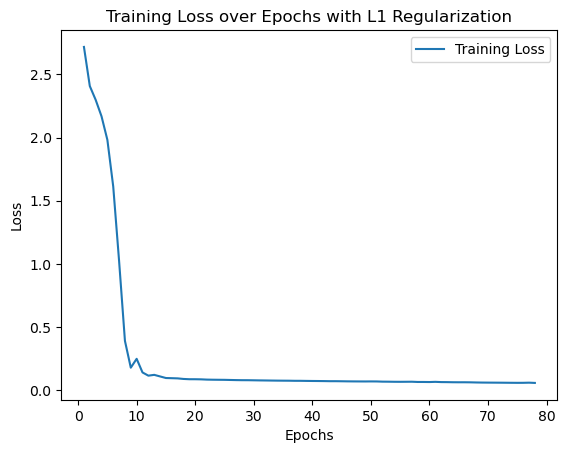

Test MSE: 0.14063386651481036


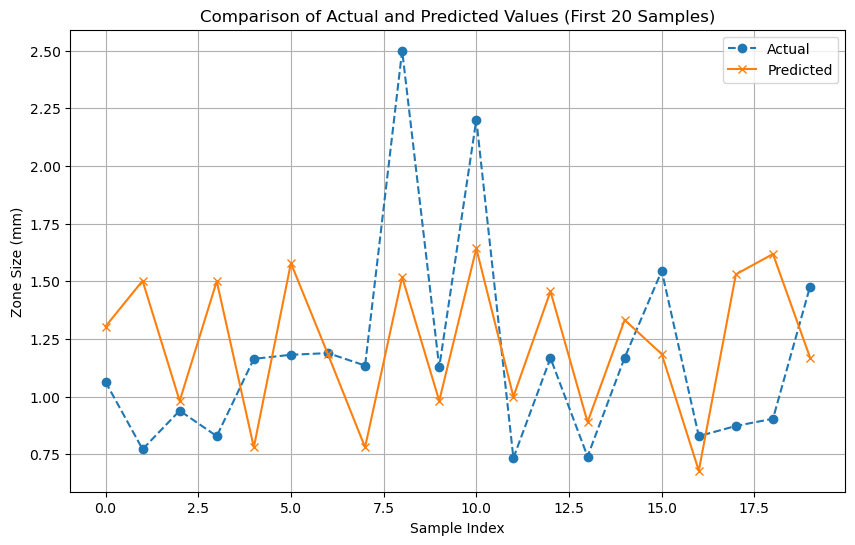

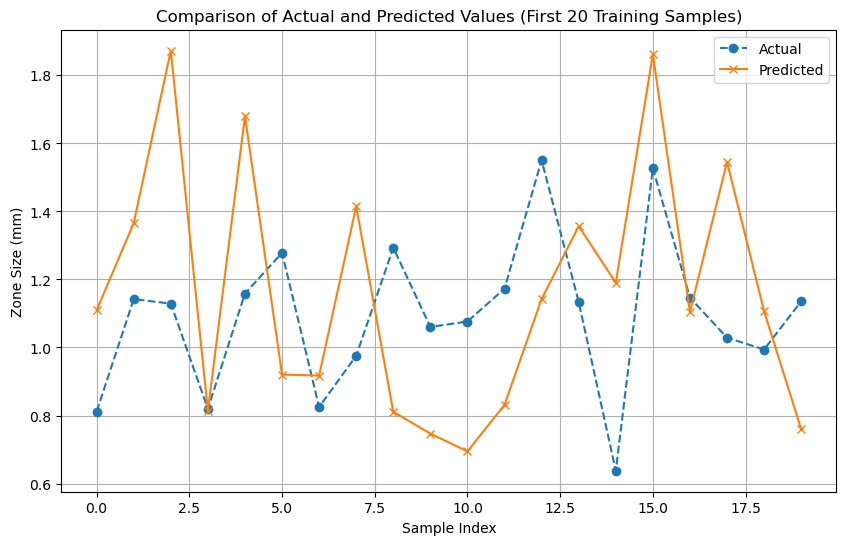

In [177]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

# Train-test split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y_updated, test_size=0.1, random_state=42)

# Feature scaling for input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(50, 50, 50, 20, 20, 20, 10, 10, 10, 5),
                   activation='relu',
                   solver='adam',
                   max_iter=1000,
                   random_state=42,
                   alpha=0.0001,  # L2 regularization
                   early_stopping=True,  # Enable early stopping
                   validation_fraction=0.1,  # Use 10% of training data for validation
                   n_iter_no_change=10) 

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predictions and performance evaluation
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

# Calculate Mean Squared Error
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(f"Training Loss (MSE): {train_loss}")
print(f"Test Loss (MSE): {test_loss}")

# Plot training loss over epochs
epochs = np.arange(1, len(mlp.loss_curve_) + 1)

plt.plot(epochs, mlp.loss_curve_, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs with L1 Regularization')
plt.legend()
plt.show()

# Evaluate model performance on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")
# Plot first 20 predicted vs actual values for the test set
y_test_pred_20 = y_test_pred[:20]
y_test_20 = y_test[:20].values

plt.figure(figsize=(10, 6))
plt.plot(y_test_20, label='Actual', marker='o', linestyle='--')
plt.plot(y_test_pred_20, label='Predicted', marker='x', linestyle='-')
plt.xlabel('Sample Index')
plt.ylabel('Zone Size (mm)')
plt.title('Comparison of Actual and Predicted Values (First 20 Samples)')
plt.legend()
plt.grid(True)
plt.show()
# Plot first 20 predicted vs actual values for the training set
y_train_pred_20 = y_train_pred[:20]
y_train_20 = y_train[:20].values

plt.figure(figsize=(10, 6))
plt.plot(y_train_20, label='Actual', marker='o', linestyle='--')
plt.plot(y_train_pred_20, label='Predicted', marker='x', linestyle='-')
plt.xlabel('Sample Index')
plt.ylabel('Zone Size (mm)')
plt.title('Comparison of Actual and Predicted Values (First 20 Training Samples)')
plt.legend()
plt.grid(True)
plt.show()

Using 903 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/100 [00:00<?, ?it/s]

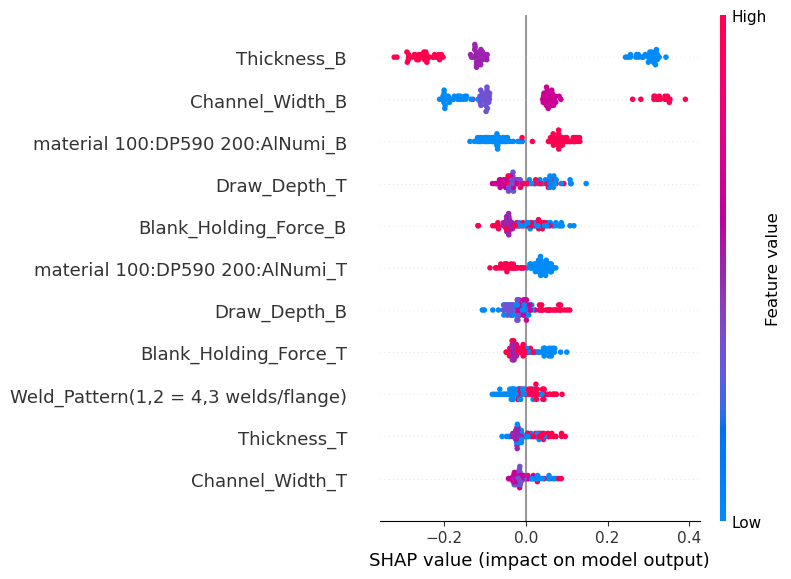

  0%|          | 0/101 [00:00<?, ?it/s]

In [178]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer with the trained neural network model
explainer = shap.KernelExplainer(mlp.predict, X_train_scaled)

# Calculate SHAP values for the test set (or a subset if it's large)
shap_values = explainer.shap_values(X_test_scaled[:100])  # Limit to first 100 samples for faster computation

# Summary plot of SHAP values (shows overall feature importance)
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns)

# Detailed force plot for the first test sample (explanation of individual prediction)
shap.force_plot(explainer.expected_value, shap_values[0], X_test_scaled[0], feature_names=X.columns)

# Optionally, you can compute SHAP values for the entire test set if desired
shap_values_full = explainer.shap_values(X_test_scaled)

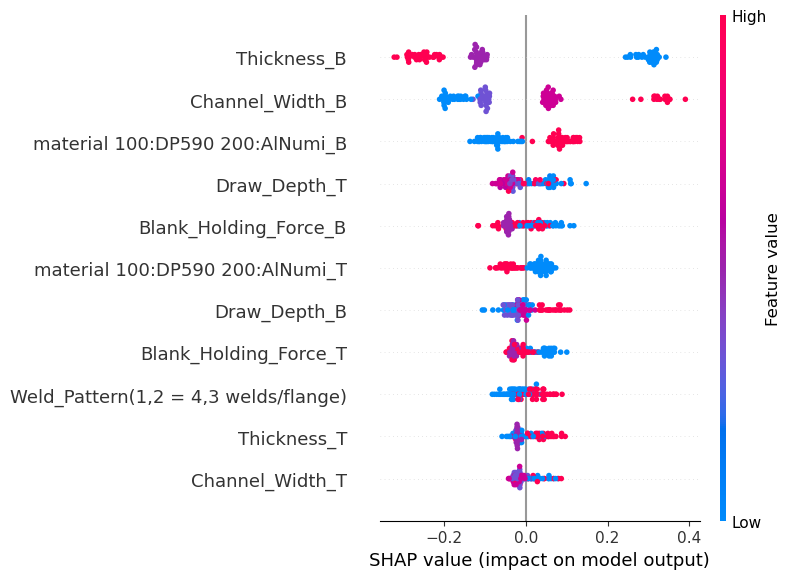

In [183]:
# Summary plot of SHAP values (shows overall feature importance)
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns)

# Detailed force plot for the first test sample (explanation of individual prediction)
shap.force_plot(explainer.expected_value, shap_values_full[0], X_test_scaled[0], feature_names=X.columns)

In [184]:
import shap
import matplotlib.pyplot as plt
import numpy as np



# Print SHAP values and model predictions for 10 test points
for i in range(10):
    test_point = X_test_scaled[i].reshape(1, -1)  # Reshape the test point for prediction
    original_prediction = mlp.predict(test_point)[0]
    
    # Calculate the explanatory model prediction as the expected value + sum of SHAP values
    explanatory_prediction = explainer.expected_value + np.sum(shap_values_full[i])

    # Print the results for each of the 10 points
    print(f"Test Point {i+1}")
    print(f"{'Original Model Prediction':30}: {original_prediction:>7.2f}")
    print(f"{'Explanatory Model Prediction':30}: {explanatory_prediction:>7.2f}\n")

# Optionally, to display SHAP force plots for all 10 points:
for i in range(10):
    shap.force_plot(explainer.expected_value, shap_values_full[i], X_test_scaled[i], feature_names=X.columns)


Test Point 1
Original Model Prediction     :    1.30
Explanatory Model Prediction  :    1.30

Test Point 2
Original Model Prediction     :    1.50
Explanatory Model Prediction  :    1.50

Test Point 3
Original Model Prediction     :    0.98
Explanatory Model Prediction  :    0.98

Test Point 4
Original Model Prediction     :    1.50
Explanatory Model Prediction  :    1.50

Test Point 5
Original Model Prediction     :    0.78
Explanatory Model Prediction  :    0.78

Test Point 6
Original Model Prediction     :    1.58
Explanatory Model Prediction  :    1.58

Test Point 7
Original Model Prediction     :    1.18
Explanatory Model Prediction  :    1.18

Test Point 8
Original Model Prediction     :    0.78
Explanatory Model Prediction  :    0.78

Test Point 9
Original Model Prediction     :    1.52
Explanatory Model Prediction  :    1.52

Test Point 10
Original Model Prediction     :    0.98
Explanatory Model Prediction  :    0.98



In [185]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP JavaScript visualizations for Jupyter
shap.initjs()

# Plot SHAP force plots for 10 test points
for i in range(10):
    # Display the force plot for each test point
    display(shap.force_plot(explainer.expected_value, shap_values_full[i], X_test_scaled[i], feature_names=X.columns))


In [193]:


# Create a table for each test point
for i in range(10):
    # Get feature names, values, and SHAP attributions for the test point
    feature_names = X.columns
    feature_values = X_test_scaled[i]  # Scaled values for the test point
    shap_attributions = shap_values_full[i]  # SHAP values for the test point
    avg_value = np.full(len(feature_names), explainer.expected_value)  # Repeat the expected value for each feature

    # Create a DataFrame for easy visualization
    data = {
        'Feature Name': feature_names,
        'Feature Value': feature_values,
        'Average Value': avg_value,
        'Attribution (SHAP Value)': shap_attributions
    }

    df = pd.DataFrame(data)

    # Print the table for each test point
    print(f"\nTest Point {i+1} SHAP Table:")
    display(df)





Test Point 1 SHAP Table:


,Feature Name,Feature Value,Average Value,Attribution (SHAP Value)
0,Channel_Width_T,0.641429,1.153964,-0.004431
1,material 100:DP590 200:AlNumi_T,-0.961963,1.153964,0.020548
2,Thickness_T,1.289926,1.153964,0.028092
3,Draw_Depth_T,0.674457,1.153964,-0.044728
4,Blank_Holding_Force_T,0.018867,1.153964,-0.028560
5,Channel_Width_B,0.568921,1.153964,0.062721
6,material 100:DP590 200:AlNumi_B,1.048809,1.153964,0.101815
7,Thickness_B,0.062286,1.153964,-0.114322
8,Draw_Depth_B,1.307539,1.153964,0.074010
9,Blank_Holding_Force_B,1.249776,1.153964,0.040479



Test Point 2 SHAP Table:


,Feature Name,Feature Value,Average Value,Attribution (SHAP Value)
0,Channel_Width_T,-1.355848,1.153964,0.028269
1,material 100:DP590 200:AlNumi_T,1.039541,1.153964,-0.074301
2,Thickness_T,0.030679,1.153964,-0.013973
3,Draw_Depth_T,-1.399014,1.153964,0.072395
4,Blank_Holding_Force_T,-1.198037,1.153964,0.020539
5,Channel_Width_B,-1.302612,1.153964,-0.163065
6,material 100:DP590 200:AlNumi_B,1.048809,1.153964,0.089115
7,Thickness_B,-1.134407,1.153964,0.308706
8,Draw_Depth_B,0.396499,1.153964,-0.015227
9,Blank_Holding_Force_B,-1.272118,1.153964,0.021698



Test Point 3 SHAP Table:


,Feature Name,Feature Value,Average Value,Attribution (SHAP Value)
0,Channel_Width_T,-1.355848,1.153964,0.034473
1,material 100:DP590 200:AlNumi_T,-0.961963,1.153964,0.055191
2,Thickness_T,1.289926,1.153964,0.059881
3,Draw_Depth_T,-0.173781,1.153964,-0.039871
4,Blank_Holding_Force_T,1.235770,1.153964,-0.033869
5,Channel_Width_B,-0.366845,1.153964,-0.095209
6,material 100:DP590 200:AlNumi_B,1.048809,1.153964,0.078766
7,Thickness_B,1.258980,1.153964,-0.213328
8,Draw_Depth_B,0.396499,1.153964,-0.003313
9,Blank_Holding_Force_B,-1.272118,1.153964,0.002945



Test Point 4 SHAP Table:


,Feature Name,Feature Value,Average Value,Attribution (SHAP Value)
0,Channel_Width_T,-0.357210,1.153964,-0.006705
1,material 100:DP590 200:AlNumi_T,-0.961963,1.153964,0.052624
2,Thickness_T,0.030679,1.153964,-0.017868
3,Draw_Depth_T,-0.456527,1.153964,-0.030214
4,Blank_Holding_Force_T,-1.198037,1.153964,0.046505
5,Channel_Width_B,-0.366845,1.153964,-0.109643
6,material 100:DP590 200:AlNumi_B,-0.953463,1.153964,-0.071110
7,Thickness_B,-1.134407,1.153964,0.326398
8,Draw_Depth_B,-0.514541,1.153964,-0.019859
9,Blank_Holding_Force_B,-1.272118,1.153964,0.117408



Test Point 5 SHAP Table:


,Feature Name,Feature Value,Average Value,Attribution (SHAP Value)
0,Channel_Width_T,-0.357210,1.153964,-0.019009
1,material 100:DP590 200:AlNumi_T,-0.961963,1.153964,0.034159
2,Thickness_T,0.030679,1.153964,-0.033785
3,Draw_Depth_T,0.580209,1.153964,-0.074258
4,Blank_Holding_Force_T,0.018867,1.153964,-0.038400
5,Channel_Width_B,0.568921,1.153964,0.058881
6,material 100:DP590 200:AlNumi_B,-0.953463,1.153964,-0.098696
7,Thickness_B,0.062286,1.153964,-0.120748
8,Draw_Depth_B,-1.425581,1.153964,-0.006881
9,Blank_Holding_Force_B,1.249776,1.153964,-0.068544



Test Point 6 SHAP Table:


,Feature Name,Feature Value,Average Value,Attribution (SHAP Value)
0,Channel_Width_T,0.641429,1.153964,-0.013933
1,material 100:DP590 200:AlNumi_T,-0.961963,1.153964,0.067414
2,Thickness_T,1.289926,1.153964,-0.024661
3,Draw_Depth_T,0.580209,1.153964,-0.036600
4,Blank_Holding_Force_T,1.235770,1.153964,-0.015295
5,Channel_Width_B,0.568921,1.153964,0.072903
6,material 100:DP590 200:AlNumi_B,-0.953463,1.153964,-0.011655
7,Thickness_B,-1.134407,1.153964,0.303952
8,Draw_Depth_B,1.307539,1.153964,0.055394
9,Blank_Holding_Force_B,-1.272118,1.153964,0.066340



Test Point 7 SHAP Table:


,Feature Name,Feature Value,Average Value,Attribution (SHAP Value)
0,Channel_Width_T,1.640067,1.153964,-0.022470
1,material 100:DP590 200:AlNumi_T,1.039541,1.153964,-0.044129
2,Thickness_T,1.289926,1.153964,0.004094
3,Draw_Depth_T,-1.304765,1.153964,0.014179
4,Blank_Holding_Force_T,0.018867,1.153964,-0.018331
5,Channel_Width_B,-1.302612,1.153964,-0.197602
6,material 100:DP590 200:AlNumi_B,-0.953463,1.153964,-0.091343
7,Thickness_B,-1.134407,1.153964,0.312106
8,Draw_Depth_B,0.396499,1.153964,-0.014849
9,Blank_Holding_Force_B,-1.272118,1.153964,0.073462



Test Point 8 SHAP Table:


,Feature Name,Feature Value,Average Value,Attribution (SHAP Value)
0,Channel_Width_T,-1.355848,1.153964,0.012911
1,material 100:DP590 200:AlNumi_T,-0.961963,1.153964,0.043151
2,Thickness_T,0.030679,1.153964,-0.023462
3,Draw_Depth_T,0.674457,1.153964,-0.038292
4,Blank_Holding_Force_T,1.235770,1.153964,-0.012111
5,Channel_Width_B,0.568921,1.153964,0.070277
6,material 100:DP590 200:AlNumi_B,-0.953463,1.153964,-0.078146
7,Thickness_B,1.258980,1.153964,-0.257256
8,Draw_Depth_B,-0.514541,1.153964,-0.048961
9,Blank_Holding_Force_B,-0.011171,1.153964,-0.040265



Test Point 9 SHAP Table:


,Feature Name,Feature Value,Average Value,Attribution (SHAP Value)
0,Channel_Width_T,-1.355848,1.153964,0.078110
1,material 100:DP590 200:AlNumi_T,-0.961963,1.153964,0.054782
2,Thickness_T,1.289926,1.153964,0.087367
3,Draw_Depth_T,-1.304765,1.153964,0.110970
4,Blank_Holding_Force_T,0.018867,1.153964,-0.023034
5,Channel_Width_B,-1.302612,1.153964,-0.167124
6,material 100:DP590 200:AlNumi_B,-0.953463,1.153964,-0.070434
7,Thickness_B,-1.134407,1.153964,0.342944
8,Draw_Depth_B,-0.514541,1.153964,-0.003266
9,Blank_Holding_Force_B,-0.011171,1.153964,-0.038256



Test Point 10 SHAP Table:


,Feature Name,Feature Value,Average Value,Attribution (SHAP Value)
0,Channel_Width_T,-1.355848,1.153964,0.019806
1,material 100:DP590 200:AlNumi_T,-0.961963,1.153964,0.023460
2,Thickness_T,-1.228567,1.153964,-0.010897
3,Draw_Depth_T,0.580209,1.153964,-0.063730
4,Blank_Holding_Force_T,0.018867,1.153964,-0.033153
5,Channel_Width_B,0.568921,1.153964,0.055178
6,material 100:DP590 200:AlNumi_B,1.048809,1.153964,0.115898
7,Thickness_B,1.258980,1.153964,-0.242481
8,Draw_Depth_B,-0.514541,1.153964,-0.037745
9,Blank_Holding_Force_B,1.249776,1.153964,-0.016757


In [192]:
print(explainer.fnull)

[1.1539636]
